In [ ]:
pip install -r "$HOME/lsc-project/requirements.txt"

In [2]:
import os
import tarfile
import gzip

metrics_dir = os.environ.get("HOME") + "/lsc-project/data/MSMetrics"
rtmcr_dir = os.environ.get("HOME") + "/lsc-project/data/MSRTMCR"

extracted_metrics = os.environ.get("SCRATCH") + "/extracted/MSMetrics"
extracted_rtmcr = os.environ.get("SCRATCH") + "/extracted/MSRTMCR"
os.makedirs(extracted_metrics, exist_ok=True)
os.makedirs(extracted_rtmcr, exist_ok=True)

def extract_tar_gz(file_path, output_dir, expected_filename):
    expected_path = os.path.join(output_dir, expected_filename)
    if os.path.exists(expected_path):
        print(f"Already unpacked: {expected_filename}")
        return
    print(f"Unpacking: {file_path}")
    try:
        with gzip.open(file_path, 'rb') as f_in:
            with tarfile.open(fileobj=f_in) as tar:
                tar.extractall(path=output_dir)
    except EOFError:
        print(f"EOFError: {file_path}")
    except tarfile.ReadError:
        print(f"tarfile.ReadError: {file_path}")

for fname in os.listdir(metrics_dir):
    if fname.endswith(".tar.gz"):
        expected_csv = fname.replace(".tar.gz", "").replace("MSMetrics", "MSMetricsUpdate") + ".csv"
        extract_tar_gz(os.path.join(metrics_dir, fname), extracted_metrics, expected_csv)

for fname in os.listdir(rtmcr_dir):
    if fname.endswith(".tar.gz"):
        expected_csv = fname.replace(".tar.gz", "").replace("MSRTMCR", "MCRRTUpdate") + ".csv"
        extract_tar_gz(os.path.join(rtmcr_dir, fname), extracted_rtmcr, expected_csv)

Already unpacked: MSMetricsUpdate_68.csv
Already unpacked: MSMetricsUpdate_69.csv
Already unpacked: MCRRTUpdate_690.csv
Already unpacked: MCRRTUpdate_689.csv
Already unpacked: MCRRTUpdate_694.csv
Already unpacked: MCRRTUpdate_688.csv
Already unpacked: MCRRTUpdate_697.csv
Already unpacked: MCRRTUpdate_699.csv
Already unpacked: MCRRTUpdate_680.csv
Already unpacked: MCRRTUpdate_692.csv
Already unpacked: MCRRTUpdate_685.csv
Already unpacked: MCRRTUpdate_693.csv
Already unpacked: MCRRTUpdate_681.csv
Already unpacked: MCRRTUpdate_683.csv
Already unpacked: MCRRTUpdate_695.csv
Already unpacked: MCRRTUpdate_691.csv
Already unpacked: MCRRTUpdate_686.csv
Already unpacked: MCRRTUpdate_698.csv
Already unpacked: MCRRTUpdate_684.csv
Already unpacked: MCRRTUpdate_696.csv
Already unpacked: MCRRTUpdate_687.csv
Already unpacked: MCRRTUpdate_682.csv


In [3]:
from dask.distributed import Client
import dask.dataframe as dd

client = Client(n_workers=20)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 20
Total threads: 20,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36809,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:35767,Total threads: 1
Dashboard: http://127.0.0.1:42839/status,Memory: 5.00 GiB
Nanny: tcp://127.0.0.1:45149,


2025-07-06 22:04:32,102 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 7b4ebfcf19da225f40f195153a1687ab initialized by task ('shuffle-transfer-7b4ebfcf19da225f40f195153a1687ab', 1371) executed on worker tcp://127.0.0.1:35767
2025-07-06 22:06:34,305 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 7c7786ea52412f183fdc2b1d32bad3c7 initialized by task ('shuffle-transfer-7c7786ea52412f183fdc2b1d32bad3c7', 32) executed on worker tcp://127.0.0.1:44779
2025-07-06 22:06:38,070 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 7b4ebfcf19da225f40f195153a1687ab deactivated due to stimulus 'task-finished-1751832398.0688372'
2025-07-06 22:06:39,352 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 7c7786ea52412f183fdc2b1d32bad3c7 deactivated due to stimulus 'task-finished-1751832399.3511932'
2025-07-06 22:06:45,560 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle e8b0eb77cdd37a4b2f5caa45bdddb17b initialized by task ('shuffle-transfer-e8b0eb77cd

In [4]:
df_metrics = dd.read_csv(os.path.join(extracted_metrics, "*.csv"))
df_metrics

,timestamp,msname,msinstanceid,nodeid,cpu_utilization,memory_utilization
npartitions=36,,,,,,
,int64,string,string,string,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [5]:
df_metrics.head()

,timestamp,msname,msinstanceid,nodeid,cpu_utilization,memory_utilization
0,124020000,MS_57387,MS_57387_POD_2616,NODE_7982,0.128292,0.881478
1,124140000,MS_18703,MS_18703_POD_395,NODE_340,0.522135,0.617765
2,122460000,MS_58753,MS_58753_POD_12,NODE_6854,0.149490,0.615449
3,123540000,MS_66711,MS_66711_POD_3138,NODE_33707,0.311229,0.734200
4,122580000,MS_6945,MS_6945_POD_11082,NODE_31986,0.161583,0.119790


In [6]:
len(df_metrics)

28196681

In [7]:
df_rtmcr = dd.read_csv(os.path.join(extracted_rtmcr, "*.csv"))
df_rtmcr

,timestamp,msname,msinstanceid,nodeid,providerrpc_rt,providerrpc_mcr,consumerrpc_rt,consumerrpc_mcr,writemc_rt,writemc_mcr,readmc_rt,readmc_mcr,writedb_rt,writedb_mcr,readdb_rt,readdb_mcr,consumermq_rt,consumermq_mcr,providermq_rt,providermq_mcr,http_mcr,http_rt
npartitions=1493,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [8]:
df_rtmcr.head()

,timestamp,msname,msinstanceid,nodeid,providerrpc_rt,providerrpc_mcr,consumerrpc_rt,consumerrpc_mcr,writemc_rt,writemc_mcr,...,writedb_rt,writedb_mcr,readdb_rt,readdb_mcr,consumermq_rt,consumermq_mcr,providermq_rt,providermq_mcr,http_mcr,http_rt
0,122520000,MS_61753,MS_61753_POD_5,NODE_11353,95.758691,0.000010,34.497275,5.659360e-12,0.602022,0.000021,...,1.599613,0.000005,1.245505,0.000028,663.5,5.892368e-08,0.000000,0.000000,0.0,0.0
1,122460000,MS_57741,MS_57741_POD_27,NODE_47184,3.968204,0.000038,0.000000,2.220344e-11,0.000000,0.000000,...,0.000000,0.000000,0.956974,0.000076,0.0,0.000000e+00,0.000000,0.000000,0.0,0.0
2,122400000,MS_49742,MS_71365_POD_1125,NODE_34523,3.059483,0.000075,20.684685,4.436058e-11,0.718750,0.000002,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.0,0.0
3,122400000,MS_18298,MS_18298_POD_205,NODE_39197,21.979608,0.000158,7.233355,9.307853e-11,0.813349,0.000306,...,1.705202,0.000003,0.684440,0.000020,0.0,0.000000e+00,5.252252,0.000001,0.0,0.0
4,122400000,MS_68681,MS_63127_POD_83,NODE_11230,8.647619,0.000001,16.454545,6.076000e-13,0.000000,0.000000,...,0.000000,0.000000,0.895631,0.000004,0.0,0.000000e+00,0.000000,0.000000,0.0,0.0


In [9]:
len(df_rtmcr)

261144068

In [10]:
rt_cols = [col for col in df_rtmcr.columns if col.endswith("_rt")]
mcr_cols = [col for col in df_rtmcr.columns if col.endswith("_mcr")]

rpc_rt_cols = [col for col in df_rtmcr.columns if col.endswith("rpc_rt")]
rpc_mcr_cols = [col for col in df_rtmcr.columns if col.endswith("rpc_mcr")]

mq_rt_cols = [col for col in df_rtmcr.columns if col.endswith("mq_rt")]
mq_mcr_cols = [col for col in df_rtmcr.columns if col.endswith("mq_mcr")]

df_rtmcr["rt"] = df_rtmcr[rt_cols].sum(axis=1)
df_rtmcr["mcr"] = df_rtmcr[mcr_cols].sum(axis=1)
df_rtmcr["rpc_rt"] = df_rtmcr[rpc_rt_cols].sum(axis=1)
df_rtmcr["rpc_mcr"] = df_rtmcr[rpc_mcr_cols].sum(axis=1)
df_rtmcr["mq_rt"] = df_rtmcr[mq_rt_cols].sum(axis=1)
df_rtmcr["mq_mcr"] = df_rtmcr[mq_mcr_cols].sum(axis=1)

df_rtmcr_grouped = (
    df_rtmcr.groupby(["timestamp", "msinstanceid"])[["rt", "mcr", "http_mcr", "http_rt", "rpc_rt", "rpc_mcr", "mq_rt", "mq_mcr"]]
    .sum()
    .reset_index()
)

df_metrics_grouped = (
    df_metrics.groupby(["timestamp", "msinstanceid"])[["cpu_utilization", "memory_utilization"]]
    .sum()
    .reset_index()
)

df_combined = dd.merge(df_metrics_grouped, df_rtmcr_grouped, on=["timestamp", "msinstanceid"], how="inner")
df_combined

,timestamp,msinstanceid,cpu_utilization,memory_utilization,rt,mcr,http_mcr,http_rt,rpc_rt,rpc_mcr,mq_rt,mq_mcr
npartitions=1,,,,,,,,,,,,
,int64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
df_combined.head()

,timestamp,msinstanceid,cpu_utilization,memory_utilization,rt,mcr,http_mcr,http_rt,rpc_rt,rpc_mcr,mq_rt,mq_mcr
0,122400000,MS_25320_POD_5450,0.08424,0.403071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,122460000,MS_28906_POD_14,0.24597,0.487211,87.147804,0.000129,0.000000,0.000000,29.420769,2.394267e-05,55.479236,0.000007
2,122460000,MS_39407_POD_59,0.30096,0.620640,37.180879,0.000092,0.000000,0.000000,23.979415,7.169052e-06,12.881877,0.000080
3,122460000,MS_43157_POD_224,0.52578,0.667996,11.481111,0.000390,0.000000,0.000000,9.588492,5.042888e-05,0.000000,0.000000
4,122520000,MS_70704_POD_10,0.14712,0.628625,146.084748,0.000011,0.000004,7.575703,91.601887,1.964124e-07,45.422006,0.000002


In [12]:
df_combined["msinstanceid"] = df_combined["msinstanceid"].str.extract(r"(MS_\d+)", expand=False)

df_agg = (
    df_combined.groupby(["timestamp", "msinstanceid"])[["rt", "mcr", "cpu_utilization", "memory_utilization", "http_mcr", "http_rt", "rpc_rt", "rpc_mcr", "mq_rt", "mq_mcr"]]
    .mean()
    .reset_index()
)
df_agg

,timestamp,msinstanceid,cpu_utilization,memory_utilization,rt,mcr,http_mcr,http_rt,rpc_rt,rpc_mcr,mq_rt,mq_mcr
npartitions=1,,,,,,,,,,,,
,int64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
df_agg.head()

,timestamp,msinstanceid,cpu_utilization,memory_utilization,rt,mcr,http_mcr,http_rt,rpc_rt,rpc_mcr,mq_rt,mq_mcr
0,122400000,MS_10720,0.105083,0.634006,20.123726,0.000664,1.669504e-07,0.095238,19.000000,9.820619e-09,0.028488,0.000664
1,122400000,MS_2019,0.065880,0.426827,16.426981,0.000004,0.000000e+00,0.000000,11.643704,1.345425e-06,0.000000,0.000000
2,122400000,MS_32498,0.223143,0.057130,11.321320,0.000093,9.276060e-05,11.321320,0.000000,0.000000e+00,0.000000,0.000000
3,122400000,MS_38502,0.274410,0.658876,53.918770,0.000074,0.000000e+00,0.000000,30.933500,1.095490e-05,21.089247,0.000015
4,122400000,MS_5491,0.072900,0.546318,101.348285,0.000001,1.865916e-07,0.037037,96.269231,1.276680e-07,0.000000,0.000000


In [14]:
len(df_agg)

126975

In [15]:
df_agg.compute()
df_agg.to_csv("results.csv", single_file=True, index=False)

['/net/people/plgrid/plgwstrzebo/results.csv']

/net/afscra/people/plgwstrzebo/slurm_jobdir/17179018/tmp.ac0127/ipykernel_558539/2466177699.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = spearmanr(group[mcr_map[col]], group[col])


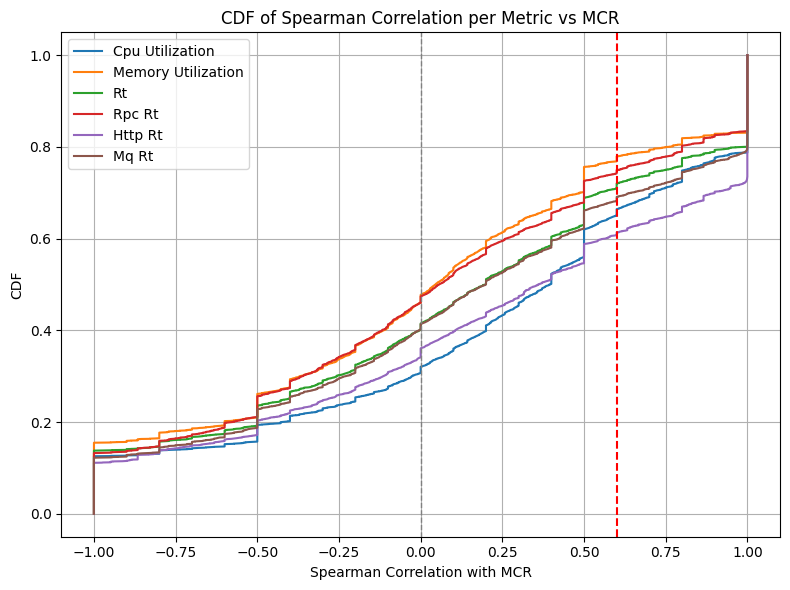

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

df = pd.read_csv("results.csv")

correlations = {
    "cpu_utilization": [],
    "memory_utilization": [],
    "rt": [],
    "rpc_rt": [],
    "http_rt": [],
    "mq_rt": []
}

mcr_map = {
    "cpu_utilization": "mcr",
    "memory_utilization": "mcr",
    "rt": "mcr",
    "rpc_rt": "rpc_mcr",
    "http_rt": "http_mcr",
    "mq_rt": "mq_mcr"
}

grouped = df.groupby("msinstanceid")
for ms, group in grouped:
    if len(group) >= 2:
        for col in correlations:
            corr, _ = spearmanr(group[mcr_map[col]], group[col])
            if not np.isnan(corr):
                correlations[col].append(corr)

plt.figure(figsize=(8, 6))
for metric, values in correlations.items():
    sorted_corr = np.sort(values)
    cdf = np.arange(1, len(sorted_corr)+1) / len(sorted_corr)
    plt.plot(sorted_corr, cdf, label=metric.replace("_", " ").title())

plt.axvline(0.6, color='red', linestyle='--', linewidth=1.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel("Spearman Correlation with MCR")
plt.ylabel("CDF")
plt.title("CDF of Spearman Correlation per Metric vs MCR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()